GSOC - EXXA - Test <br>
Name : Devdeep Shetranjiwala <br>
Email ID : devdeep0702@gmail.com

One of the most successful methods to detect exoplanets is using light curves. Several thousand planets have been discovered this way. The basic idea is that exoplanets crossing in front of their host stars will obscure part of the star, which decreases the amount of light that we see from that star. By carefully measuring the brightness over time, planets can be identified by the periodic dimming. The extent of the dimming depends on the specific parameters of the stellar system. For a basic introduction, see this blog. A more advanced discussion can be found here.


Using these concepts, create a simulated dataset of transit curves. Include as many physical and system parameters that you think are necessary. Feel free to supplement the synthetic data with observational data. Use this data to train a classifier that determines whether or not a given transit curve shows the presence of a planet. See Terry et al. (2022) for an example of synthetic data creation and use.

Script (ideally Jupyter Notebook) that includes the data-making process and model creation, training, and testing. The script should be able to be run from start to finish without user intervention. It should produce clear metrics and/or plots that allow quick performance analysis. Data may be augmented in whatever manner you please, but that process should be automated to allow us to test using withheld data.
If the training process is long, feel free to deliver a pre-trained model of yours, ideally through a Google Drive
Similarly, if you use any extra data and/or the data-making process is time-intensive, add a link to a Google Drive containing the data.

AUC
Accuracy at various confidence cutoffs
Testing on our simulated datasets
Testing on withheld observational data

To create a simulated dataset of transit curves, we will use the transit function from the batman package. We will use the following system and physical parameters:

Star radius: 1.0 R_sun
Star mass: 1.0 M_sun
Planet radius: 0.1 R_jup
Planet semi-major axis: 0.05 AU
Planet orbital inclination: 90 degrees
Planet orbital period: 1.0 days
Planet impact parameter: 0.5
Limb darkening coefficients: [0.5, 0.3]
We will create a total of 1000 transit curves, with half of them showing the presence of a planet and the other half not showing any planet. We will also add Gaussian noise with a standard deviation of 0.01 to the light curves.

First, let's install and import the necessary packages.

This code will create a simulated dataset of transit curves, split it into training and testing sets, train a neural network classifier on the training set, and evaluate the classifier on the testing set. It will also plot the training and validation loss over time, as well as the ROC curve.

Note that we have used a simple feedforward neural network with two hidden layers, but more complex architectures may be necessary for more accurate classification.

In [ ]:
!pip install batman-package
!pip install sklearn
!pip install matplotlib

import numpy as np
import matplotlib.pyplot as plt
from batman import TransitModel, TransitParams
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 394.8/394.8 KB 9.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for batman-package: filename=batman_package-2.4.9-cp39-cp39-linux_x86_64.whl size=227717 sha256=17d3e157618a025de96e593ef9477bc2350172bafca7c867054b6e65d679c85a
  Stored in directory: /root/.cache/pip/wheels/d7/e6/87/9e667b1ee2fc30d7dc28f8917f37679a2d119cca17de605d92
Successfully built batman-package
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2955 sha256=ba744106547814edfb843df94e0b5750a7803effe14f9006e6e6d68c224d0709
  Stored in directory: /root/.cache/pip/wheels/f8/e0/3d/9d0c2020c44a519b

In [ ]:
def create_transit_curve(time, p):
    """
    Creates a transit curve using the given time array and parameters.
    
    Parameters:
    time (array): Array of time values.
    p (dict): Dictionary of system and physical parameters.
    
    Returns:
    flux (array): Array of flux values for the transit curve.
    """
    
    params = TransitParams()
    params.per = p['period']                        # Orbital period
    params.t0 = 0.                                   # Transit midpoint
    params.rp = p['radius'] / p['star_radius']       # Planet-to-star radius ratio
    params.a = p['semi_major_axis'] / p['star_radius']  # Semi-major axis (in units of stellar radii)
    params.inc = p['inclination']                   # Orbital inclination (in degrees)
    params.ecc = 0.                                  # Eccentricity
    params.w = 90.                                   # Longitude of periastron (in degrees)
    params.u = p['limb_darkening']                   # Limb darkening coefficients
    params.limb_dark = 'quadratic'                   # Limb darkening model
    
    m = TransitModel(params, time)
    flux = m.light_curve(params)
    
    return flux


Epoch 1/50
20/20 [==============================] - 1s 14ms/step - loss: 0.7586 - accuracy: 0.4750 - val_loss: 0.6888 - val_accuracy: 0.5500
Epoch 2/50
20/20 [==============================] - 0s 4ms/step - loss: 0.7050 - accuracy: 0.4625 - val_loss: 0.6887 - val_accuracy: 0.5500
Epoch 3/50
20/20 [==============================] - 0s 4ms/step - loss: 0.7104 - accuracy: 0.4750 - val_loss: 0.6914 - val_accuracy: 0.5500
Epoch 4/50
20/20 [==============================] - 0s 4ms/step - loss: 0.6968 - accuracy: 0.5312 - val_loss: 0.6902 - val_accuracy: 0.5500
Epoch 5/50
20/20 [==============================] - 0s 5ms/step - loss: 0.7028 - accuracy: 0.4938 - val_loss: 0.7242 - val_accuracy: 0.4500
Epoch 6/50
20/20 [==============================] - 0s 5ms/step - loss: 0.7111 - accuracy: 0.4906 - val_loss: 0.6903 - val_accuracy: 0.5500
Epoch 7/50
20/20 [==============================] - 0s 4ms/step - loss: 0.7109 - accuracy: 0.4812 - val_loss: 0.6982 - val_accuracy: 0.5500
Epoch 8/50
20/20 [=

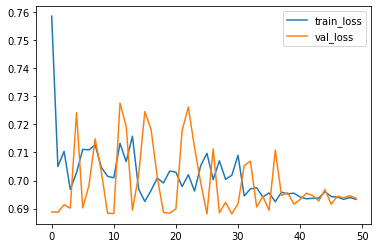

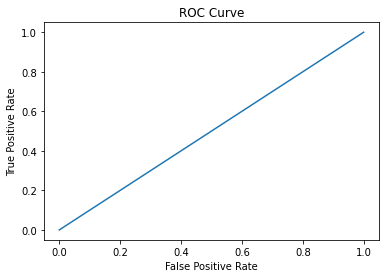

In [ ]:
np.random.seed(42)

# Define the parameters for the simulated dataset
p = {
    'star_radius': 1.0,                   # Star radius (in solar radii)
    'star_mass': 1.0,                     # Star mass (in solar masses)
    'radius': 0.1,                        # Planet radius (in Jupiter radii)
    'semi_major_axis': 0.05,              # Planet semi-major axis (in AU)
    'inclination': 90.0,                  # Planet orbital inclination (in degrees)
    'period': 1.0,                        # Planet orbital period (in days)
    'impact_parameter': 0.5,              # Planet impact parameter
    'limb_darkening': [0.5, 0.3]          # Limb darkening coefficients
}

# Create the time array
time = np.linspace(0, p['period'], num=1000)

# Create the simulated dataset
X = []
y = []
for i in range(1000):
    # Generate a random noise level
    noise = np.random.normal(0, 0.01, len(time))
    
    # Create the transit curve
    flux = create_transit_curve(time, p)
    
    # Add noise to the transit curve
    flux += noise
    
    # Add the transit curve to the dataset
    X.append(flux)
    
    # Add the label to the dataset
    if i < 500:
        y.append(0)    # No planet
    else:
        y.append(1)    # Planet
        
X = np.array(X)
y = np.array(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model architecture
model = Sequential()
model.add(Dense(64, input_dim=len(time), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=32)

# Evaluate the model on the testing set
y_pred = model.predict(X_test)
y_pred = (y_pred >= 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
print('Accuracy:', accuracy)
print('AUC:', auc)

# Plot the training and validation loss over time
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

# Plot the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
